In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
!pip install xlrd==1.2.0

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path="/content/drive/MyDrive/data.csv"
df=pd.read_csv(path)

In [ ]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     61900 non-null  object 
 1   day                                                         61900 non-null  int64  
 2   month                                                       61900 non-null  int64  
 3   year                                                        61900 non-null  int64  
 4   cases                                                       61900 non-null  int64  
 5   deaths                                                      61900 non-null  int64  
 6   countriesAndTerritories                                     61900 non-null  object 
 7   geoId                                                       61625 non-null  object 
 

In [ ]:
df.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,6.177700e+04,59021.000000
mean,15.628934,7.067157,2019.998918,1155.147237,26.055460,4.098770e+07,66.320586
std,8.841582,2.954776,0.032882,6779.224479,131.227055,1.531294e+08,162.329240
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.757526
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06,6.724045
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07,52.572719
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210


**1.The percentage of null values**

In [ ]:
df.isna().sum()
#calculating the percentage of null values

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          275
countryterritoryCode                                           123
popData2019                                                    123
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
dtype: int64

2.The number of cases and deaths per country

In [6]:
groupement=df.groupby('countriesAndTerritories')['cases','deaths'].sum().sort_values('cases',ascending=False)
groupement

<ipython-input-6-a7ca487b6f88>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groupement=df.groupby('countriesAndTerritories')['cases','deaths'].sum().sort_values('cases',ascending=False)


,cases,deaths
countriesAndTerritories,,
United_States_of_America,16256754,299177
India,9884100,143355
Brazil,6901952,181402
Russia,2653928,46941
France,2376852,57911
...,...,...
Montserrat,13,1
Anguilla,10,0
Marshall_Islands,4,0


**The mortality rate**


In [7]:
groupement['mortality']=groupement['deaths']/groupement['cases']


In [8]:
groupement.head()

,cases,deaths,mortality
countriesAndTerritories,,,
United_States_of_America,16256754,299177,0.018403
India,9884100,143355,0.014504
Brazil,6901952,181402,0.026283
Russia,2653928,46941,0.017687
France,2376852,57911,0.024365


**Plotting highest mortality rate per country**

Text(0.5, 1.0, 'Countries with highest mortality rates')

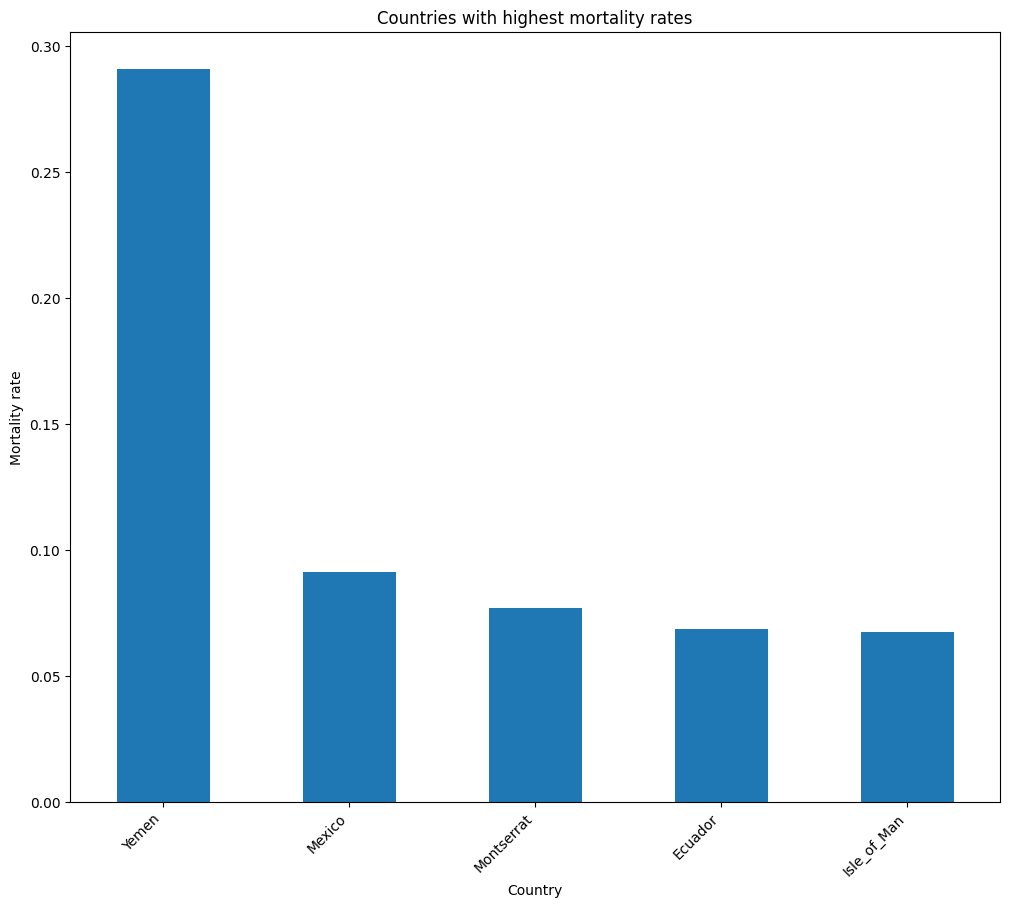

In [9]:
plt.figure(figsize=(12,10))
ax = groupement['mortality'].sort_values(ascending=False).head(5).plot(kind="bar")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_xlabel("Country")
ax.set_ylabel("Mortality rate")
ax.set_title("Countries with highest mortality rates")

**highest deaths per country **

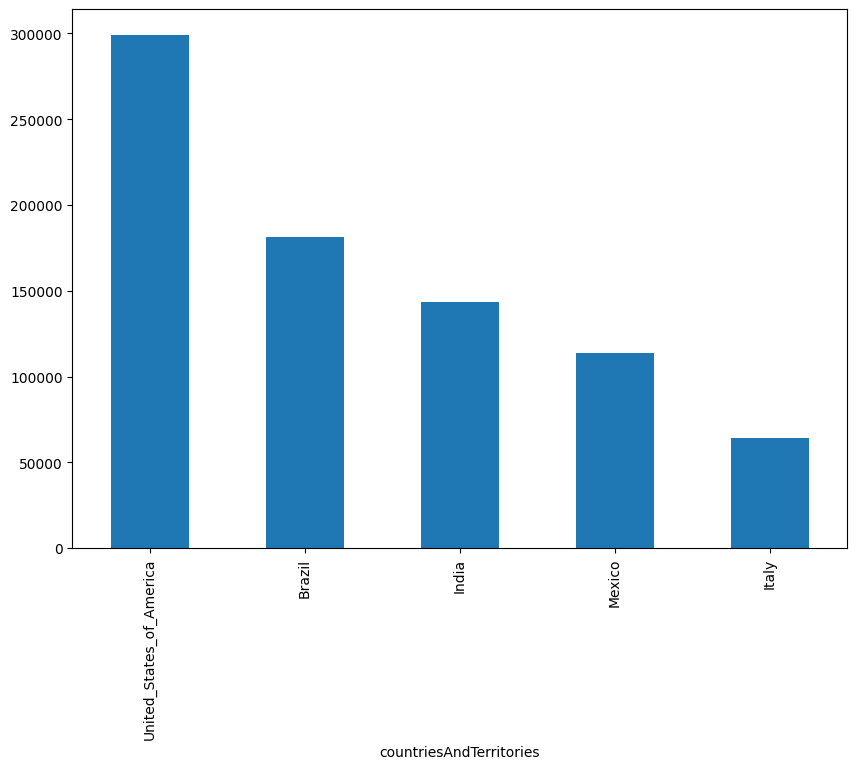

In [16]:
plt.figure(figsize=(10,7))
ax=groupement['deaths'].sort_values(ascending=False).head(5).plot(kind="bar")
#plt.plot(groupement['deaths'].sort_values(ascending=False).head(5))

** number of cases and deaths per month **

In [17]:
df_per_month=df.groupby('month')['cases','deaths'].sum()
df_per_month.head()

<ipython-input-17-204e6d6bdd36>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_per_month=df.groupby('month')['cases','deaths'].sum()


,cases,deaths
month,,
1,9799,213
2,75422,2708
3,723738,35814
4,2339594,189180
5,2891996,140142


Text(0, 0.5, 'number of deaths')

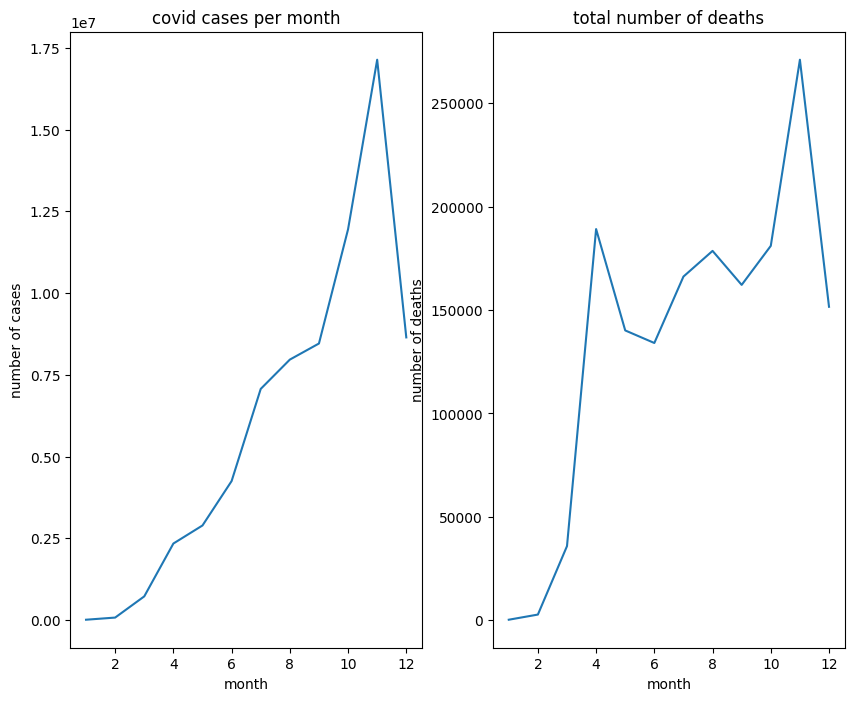

In [25]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.plot(df_per_month['cases'])
plt.title("covid cases per month")
plt.xlabel("month")
plt.ylabel("number of cases")
plt.subplot(1,2,2)
plt.plot(df_per_month['deaths'])
plt.title("total number of deaths")
plt.xlabel("month")
plt.ylabel("number of deaths")

**Countries who have a strict confinment**

In [27]:
df_germany=df[df.countriesAndTerritories=="Germany"]
df_germany_monthwise=df_germany.groupby("month")['cases','deaths'].sum()
df_germany_grouped=df_germany_monthwise.reset_index()

df_uk=df[df.countriesAndTerritories=="United_Kingdom"]
df_uk_monthwise=df_uk.groupby("month")['cases','deaths'].sum()
df_uk_grouped=df_uk_monthwise.reset_index()

df_france=df[df.countriesAndTerritories=="France"]
df_france_monthwise=df_france.groupby("month")['cases','deaths'].sum()
df_france_grouped=df_france_monthwise.reset_index()

df_italy=df[df.countriesAndTerritories=="Italy"]
df_italy_monthwise=df_italy.groupby("month")['cases','deaths'].sum()
df_italy_grouped=df_italy_monthwise.reset_index()

<ipython-input-27-4daaf5a8db74>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_germany_monthwise=df_germany.groupby("month")['cases','deaths'].sum()
<ipython-input-27-4daaf5a8db74>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_uk_monthwise=df_uk.groupby("month")['cases','deaths'].sum()
<ipython-input-27-4daaf5a8db74>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_france_monthwise=df_france.groupby("month")['cases','deaths'].sum()
<ipython-input-27-4daaf5a8db74>:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_italy_monthwise=df_italy.groupby("month")['cases','deaths'].sum()


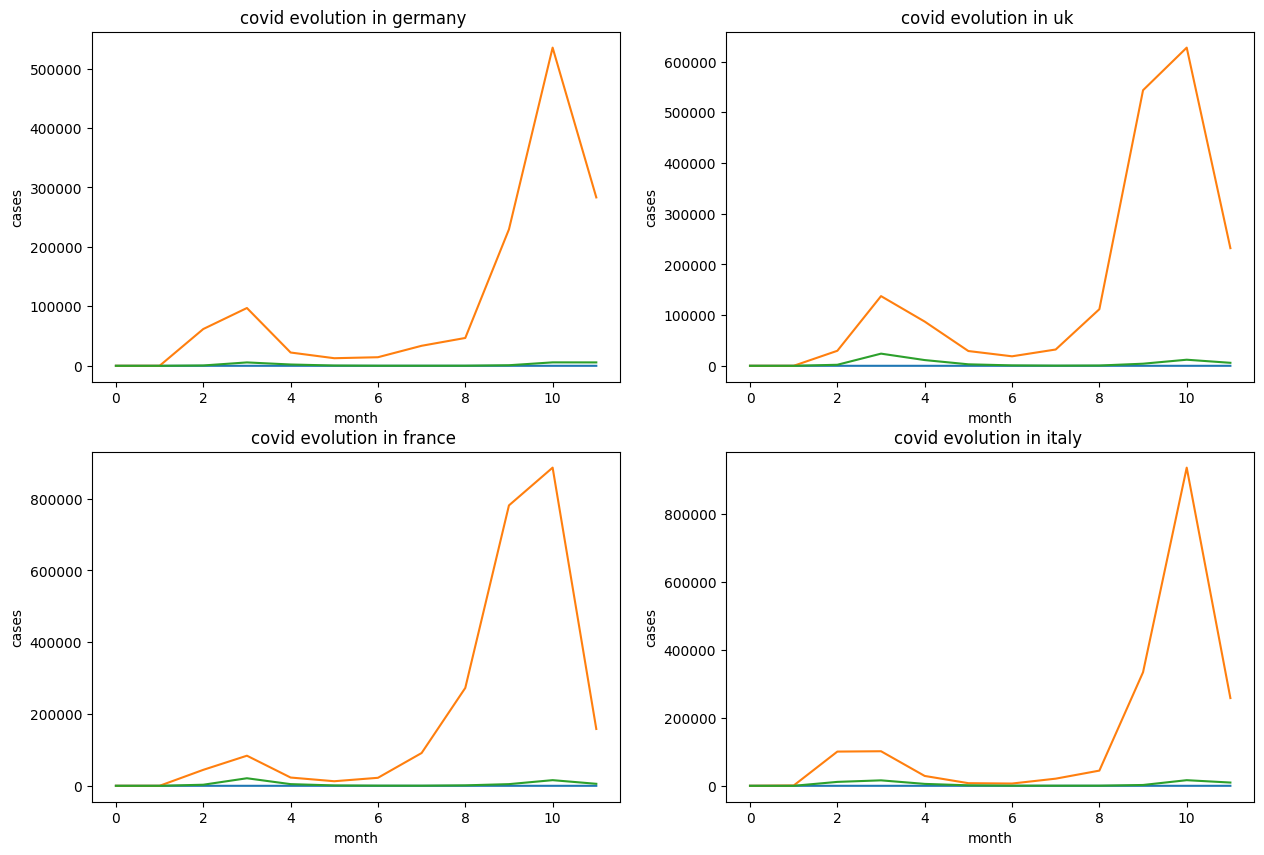

In [33]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(df_germany_grouped)
plt.title("covid evolution in germany ")
plt.xlabel("month")
plt.ylabel("cases")

plt.subplot(2,2,2)
plt.plot(df_uk_grouped)
plt.title("covid evolution in uk ")
plt.xlabel("month")
plt.ylabel("cases")

plt.subplot(2,2,3)
plt.plot(df_france_grouped)
plt.title("covid evolution in france ")
plt.xlabel("month")
plt.ylabel("cases")

plt.subplot(2,2,4)
plt.plot(df_italy_grouped)
plt.title("covid evolution in italy ")
plt.xlabel("month")
plt.ylabel("cases")

plt.show()

**Situation per continent**

In [39]:
df.groupby("continentExp")['cases',"deaths"].sum().sort_values("cases",ascending=False)


<ipython-input-39-6711cbec0dc6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("continentExp")['cases',"deaths"].sum().sort_values("cases",ascending=False)


,cases,deaths
continentExp,,
America,30887593,785420
Europe,21400012,479789
Asia,16782046,290129
Africa,2379827,56334
Oceania,53440,1154
Other,696,7


In [41]:
df_c=df.groupby("continentExp")['cases',"deaths"].sum().sort_values("deaths",ascending=False)
df_c

<ipython-input-41-ef5e2ff6b830>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_c=df.groupby("continentExp")['cases',"deaths"].sum().sort_values("deaths",ascending=False)


,cases,deaths
continentExp,,
America,30887593,785420
Europe,21400012,479789
Asia,16782046,290129
Africa,2379827,56334
Oceania,53440,1154
Other,696,7


**Mortality rate per continent**

In [43]:
df_c["mortality_rate"]=df_c["deaths"]/df_c["cases"]
df_c.sort_values("mortality_rate",ascending=False)

,cases,deaths,mortality_rate
continentExp,,,
America,30887593,785420,0.025428
Africa,2379827,56334,0.023671
Europe,21400012,479789,0.022420
Oceania,53440,1154,0.021594
Asia,16782046,290129,0.017288
Other,696,7,0.010057
